### OBJECTIVE: Predicting a player's potential score

In [2]:
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import MinMaxScaler

import joblib

#### load data and clean

In [3]:
#load data

fif = pd.read_excel('fifa_data-2.xlsx', skiprows=1)

In [4]:
fif['Wage'].str.replace('K', '000')

0        565000
1        405000
2        290000
3        260000
4        355000
          ...  
18201      1000
18202      1000
18203      1000
18204      1000
18205      1000
Name: Wage, Length: 18206, dtype: object

In [5]:
fif['Wage'] = fif['Wage'].str.replace('K', '000').astype(float)

In [6]:
fif['Wage']

0        565000.0
1        405000.0
2        290000.0
3        260000.0
4        355000.0
           ...   
18201      1000.0
18202      1000.0
18203      1000.0
18204      1000.0
18205      1000.0
Name: Wage, Length: 18206, dtype: float64

In [7]:
meanWage = fif['Wage'].mean()
fif['Wage'].fillna(meanWage, inplace=True)

In [8]:
fif['Wage']

0        565000.0
1        405000.0
2        290000.0
3        260000.0
4        355000.0
           ...   
18201      1000.0
18202      1000.0
18203      1000.0
18204      1000.0
18205      1000.0
Name: Wage, Length: 18206, dtype: float64

In [9]:
fif_2 = fif[['Potential', 'Age', 'Overall', 'Wage']]

In [10]:
fif_2.head()

,Potential,Age,Overall,Wage
0,94,31,94,565000.0
1,94,33,94,405000.0
2,93,26,92,290000.0
3,93,27,91,260000.0
4,92,27,91,355000.0


#### choosing target and predictors

- target = Potential
- predictors = Wage, Overall, Age


In [11]:
y = fif_2['Potential']
X = fif_2[['Wage', 'Age', 'Overall']]

# alternatively
# X = fif_2.drop('Potential', axis=1)

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18206 entries, 0 to 18205
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Wage     18206 non-null  float64
 1   Age      18206 non-null  int64  
 2   Overall  18206 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 426.8 KB


In [13]:
X.describe()

,Wage,Age,Overall
count,18206.000000,18206.000000,18206.000000
mean,9855.441136,25.121828,66.237394
std,21954.422816,4.669793,6.906874
min,1000.000000,16.000000,46.000000
25%,1000.000000,21.000000,62.000000
50%,3000.000000,25.000000,66.000000
75%,9855.441136,28.000000,71.000000
max,565000.000000,45.000000,94.000000


#### split the data 80/20
80% for training, 20% for testing

In [14]:
RANDOM_FACTOR = 42
TEST_SIZE = 0.2

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_FACTOR)


In [15]:
X_train.shape

(14564, 3)

In [16]:
X_test.shape

(3642, 3)

#### build the model

In [17]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

#### testing the model

In [18]:
y_pred = model.predict(X_test)

In [19]:
results = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
results

,Actual,Predicted
5847,77,74.635647
14632,67,67.821813
15999,78,71.636889
12350,68,69.516571
1989,80,80.610694
...,...,...
9623,74,73.036484
1604,75,75.219656
10098,66,66.699464
17725,53,43.041720


#### evaluate the model
the lower the error, the better

In [20]:
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, y_pred)

print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Root Mean Squared Error: 2.58
Mean Absolute Error: 2.03


In [21]:
r2_score(Y_test, y_pred)

0.8204387017946939

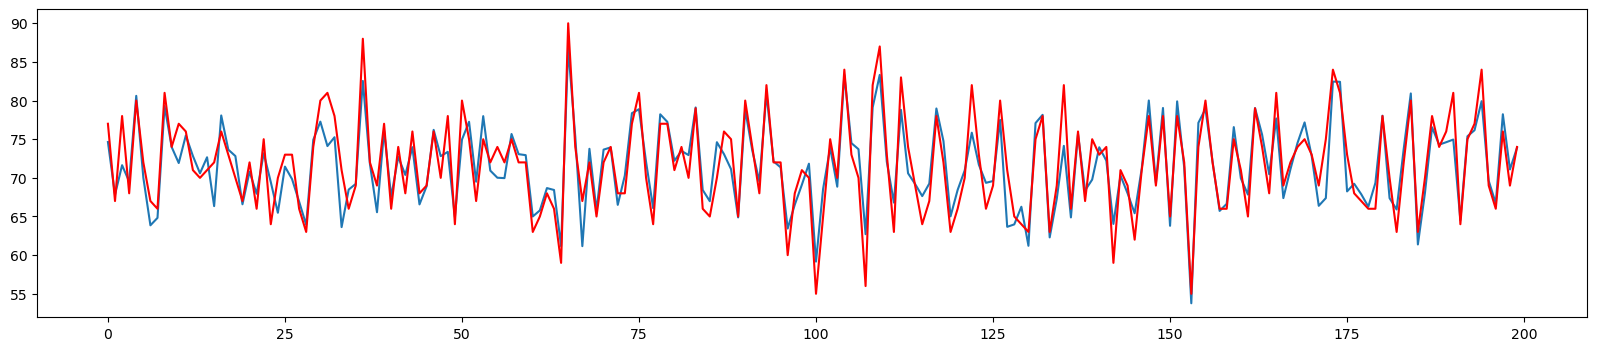

In [22]:
Y_test_shaped = Y_test.values.reshape(-1,1)
plt.figure(figsize=(20,4))
plt.plot(y_pred[:200])
plt.plot(Y_test_shaped[:200],'r')

In [23]:
Y_test.shape

(3642,)

In [24]:
Y_test_shaped.shape

(3642, 1)

## Assignment: build the same model, but without "Age" as predictor

In [25]:
X2 = fif_2[['Wage', 'Overall']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=TEST_SIZE, random_state=RANDOM_FACTOR)

In [26]:
model2 = LinearRegression()
model2.fit(X2_train, y2_train)

LinearRegression()

In [27]:
y2_pred = model2.predict(X2_test)

In [28]:
results2 = pd.DataFrame({'Actual': y2_test, 'Predicted': y2_pred})
results2

,Actual,Predicted
5847,77,72.600544
14632,67,68.238190
15999,78,66.815355
12350,68,69.294230
1989,80,75.722601
...,...,...
9623,74,71.177709
1604,75,75.814729
10098,66,70.350271
17725,53,64.198287


In [29]:
mse2 = mean_squared_error(y2_test, y2_pred)
rmse2 = np.sqrt(mse2)
mae2 = mean_absolute_error(y2_test, y2_pred)

print(f'Root Mean Squared Error: {rmse2:.2f}')
print(f'Mean Absolute Error: {mae2:.2f}')

Root Mean Squared Error: 4.51
Mean Absolute Error: 3.68


In [30]:
r2_score(y2_test, y2_pred)

0.4499381671052788

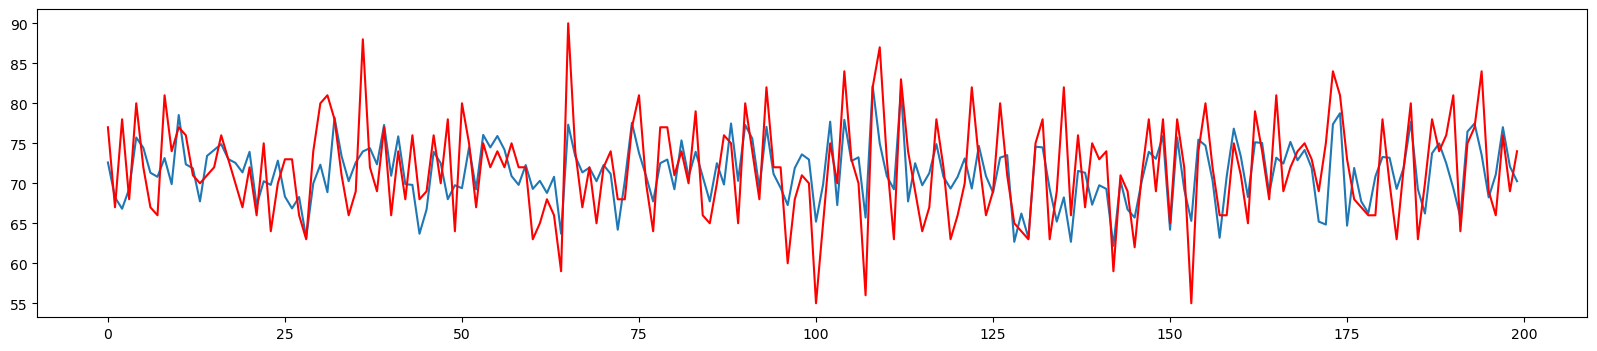

In [31]:
y2_test_shaped = y2_test.values.reshape(-1,1)
plt.figure(figsize=(20,4))
plt.plot(y2_pred[:200])
plt.plot(y2_test_shaped[:200],'r')

##### Conclusion: Adding "Age" as a predictor gives us a better model

### Saving a model to file

In [32]:
import pickle

filename = 'regression.pickle'
pickle.dump(model, open(filename, 'wb'))


### Loading a saved model


In [34]:
loaded_model = pickle.load(open(filename, 'rb'))

res = loaded_model.score(X_test, Y_test)
print(res)


0.8204387017946939
